# Experimenting with making movies

Roland and I were exploring some ways of making animations from plots in python.  Both of the methods below require ffmpeg, which we installed following this guide:
https://www.wikihow.com/Install-FFmpeg-on-Windows


 ## Method 1: using matplotlib.animation.FuncAnimation
 
 This could work fine, but I didn't totally figure it out.  An advantage is that it doesn't require generating a bunch of still frame images.

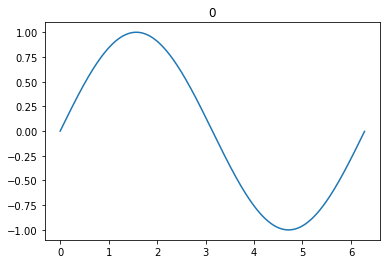

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    plt.title(str(i))
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)


plt.show()

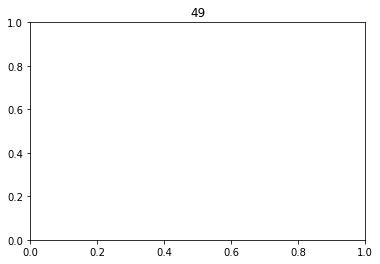

In [2]:
# To save the animation, use e.g.
#
#ani.save("movie.mp4")
#
# or
#
writer = animation.FFMpegWriter(
    fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("movie.mp4", writer=writer)


## Method 2: Generate still images and weave them together with a command-line call to ffmpeg

This seems like a fine solution.

In [10]:
__figdir__ = '../plots_tom/' 
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 700
plt.close('all')


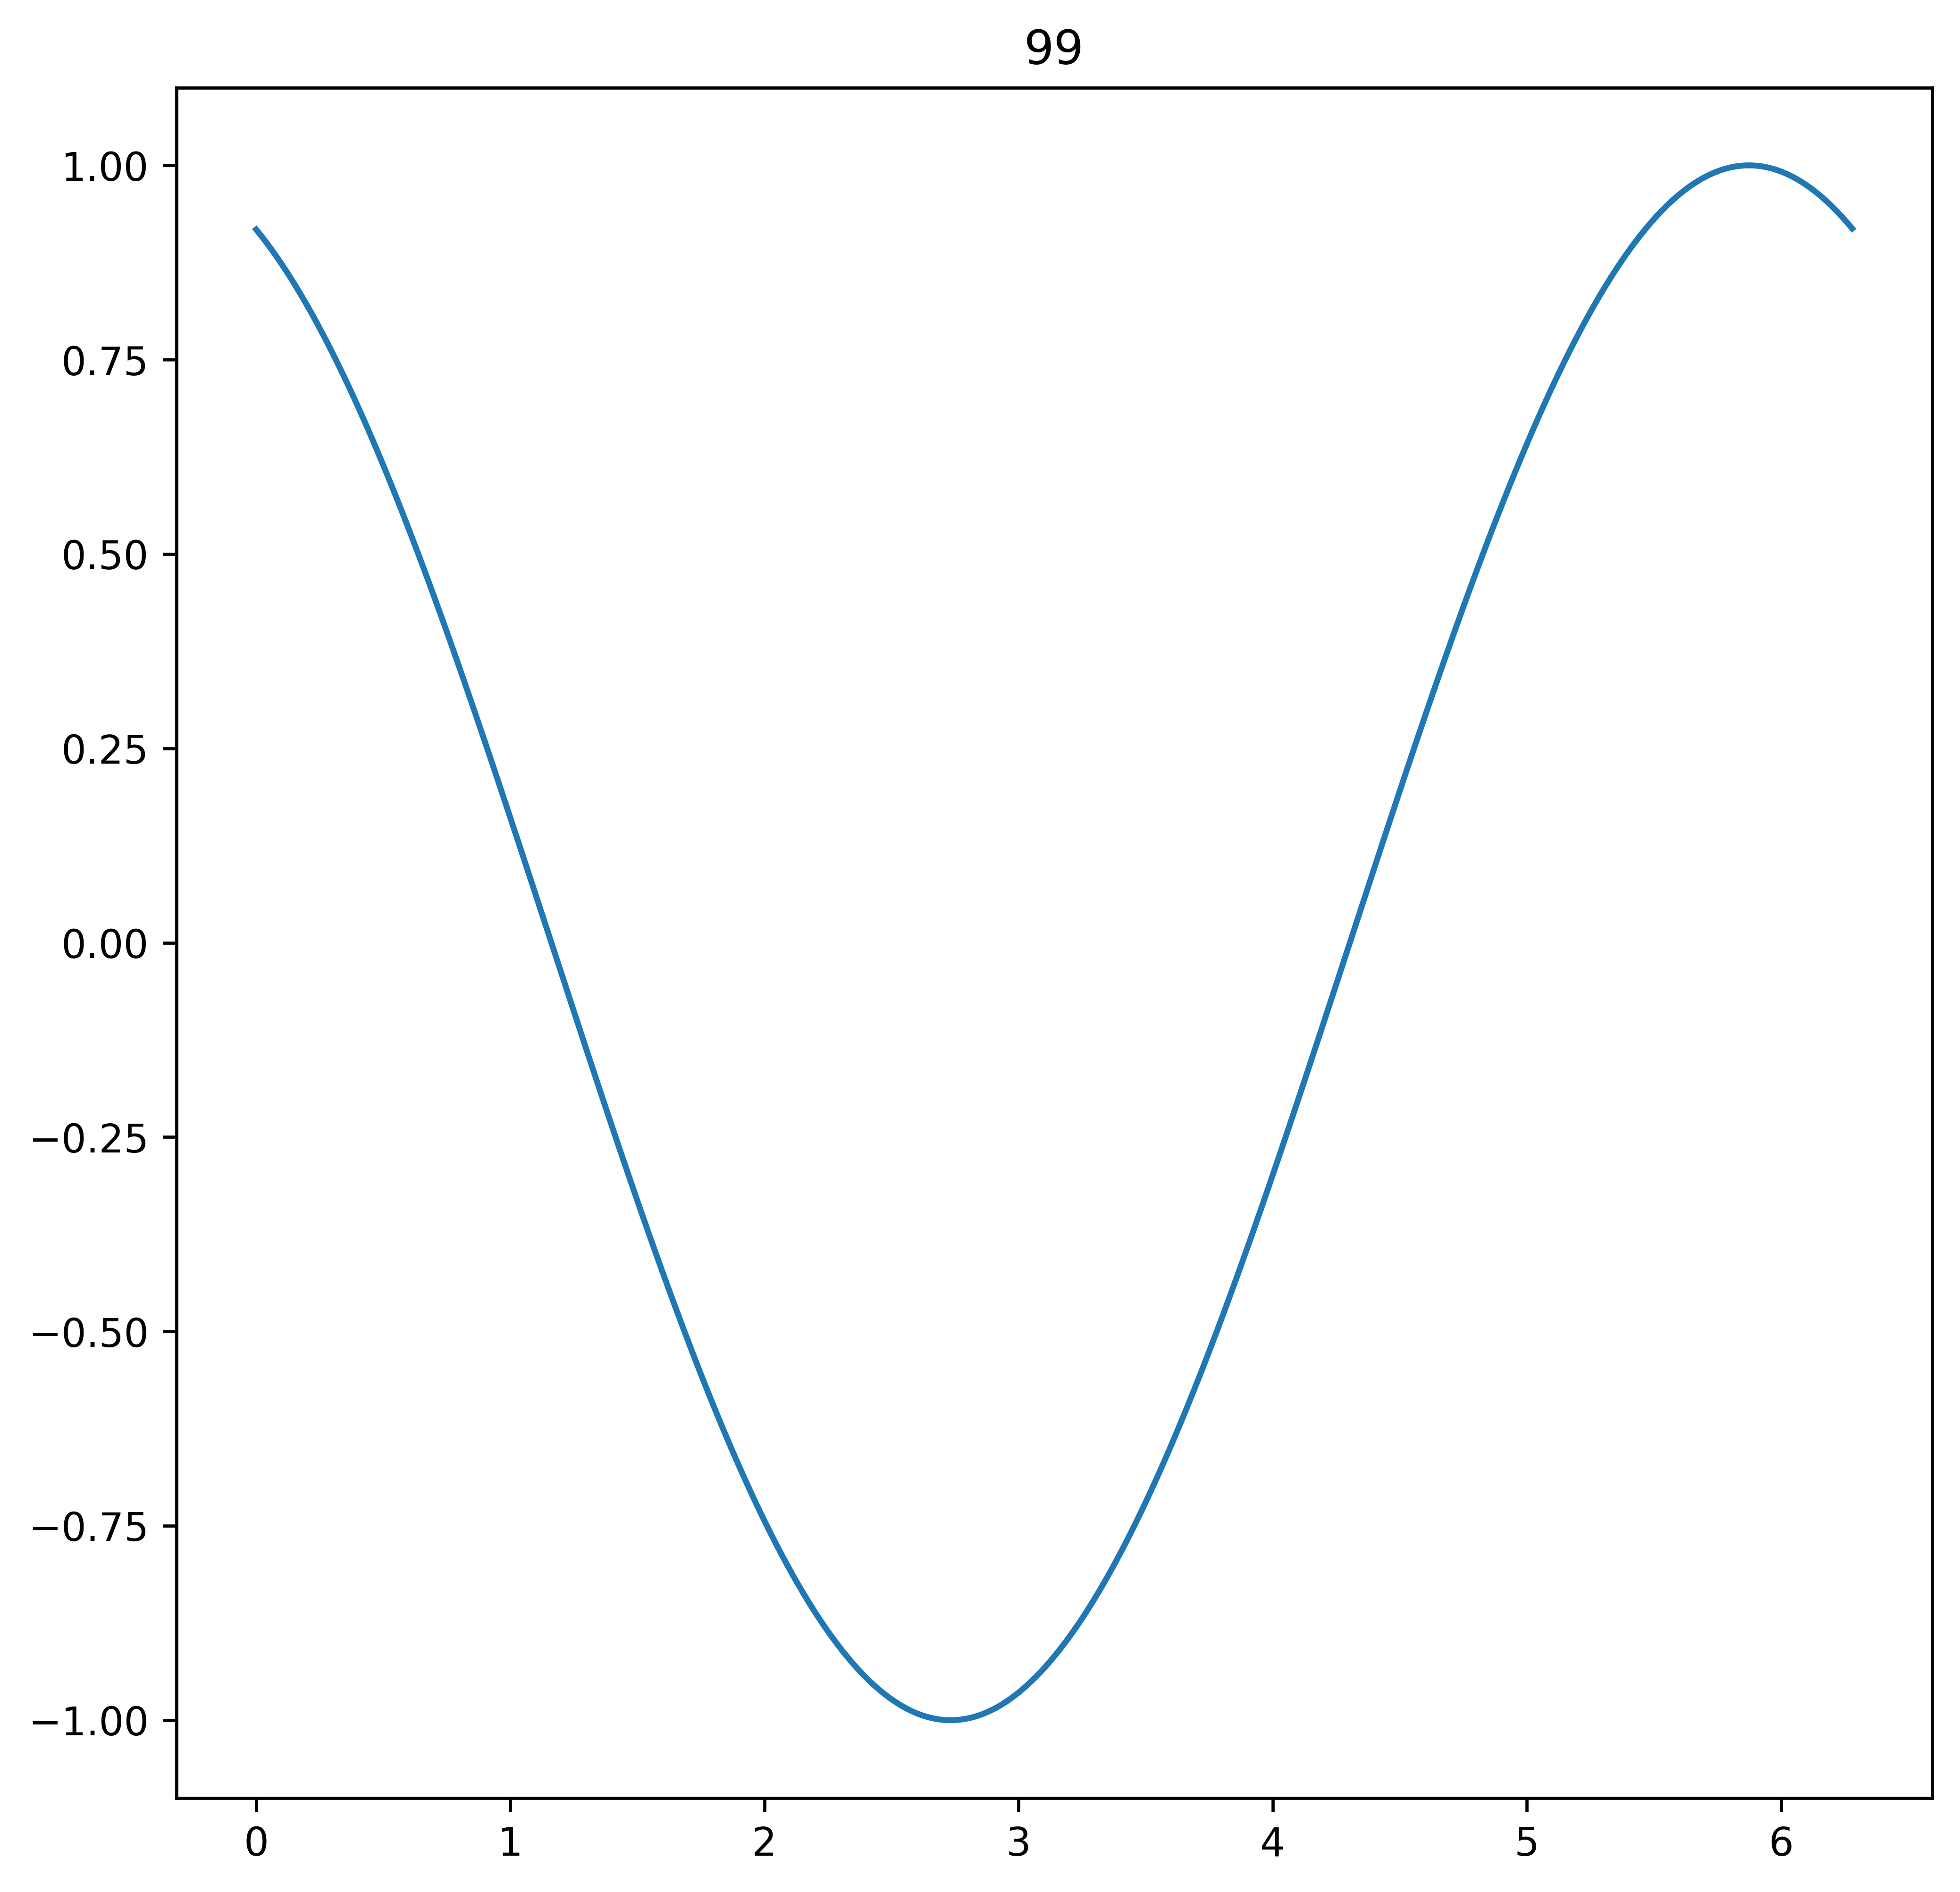

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


for i in range(100):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    plt.title(str(i))
    plt.savefig(__figdir__+'img'+ str(i) + '.' +plotfiletype,**savefig_args)



In [4]:
cd satellite_python_2022/notebooks

[WinError 3] The system cannot find the path specified: 'satellite_python_2022/notebooks'
C:\Users\jtomf\Documents\Python\satellite_python_2022\notebooks


In [5]:
pwd

'C:\\Users\\jtomf\\Documents\\Python\\satellite_python_2022\\notebooks'

In [6]:
cd $__figdir__

C:\Users\jtomf\Documents\Python\satellite_python_2022\plots_tom


In [9]:
#!ffmpeg -r 5 -i img%d.png video4.avi
!ffmpeg -framerate 3 -r 3 -i img%d.png -s 1920x1080 -r 5 video5.avi

# Roland did it this way:
# !ffmpeg -framerate 1 -r 2 -f image2 -s 1920x1080 -i SST_Plot2020_%d.png test2.mp4

ffmpeg version 2022-01-27-git-3c831847a8-full_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 11.2.0 (Rev7, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-libsnappy --enable-zlib --enable-librist --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libdav1d --enable-libdavs2 --enable-libuavs3d --enable-libzvbi --enable-librav1e --enable-libsvtav1 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs2 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-mediafoundation --enable-libass --enable-frei0r --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --ena